In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
data = pd.read_csv("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical8/DRREDDY.csv")

In [24]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,13280,2.002904e+12,NaN,NaN,NaN
1,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,57142,9.024405e+12,NaN,NaN,NaN
2,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,119697,1.909155e+13,NaN,NaN,NaN
3,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,121966,1.990625e+13,NaN,NaN,NaN
4,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,79641,1.262497e+13,NaN,NaN,NaN


In [25]:
# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

In [26]:
# Dropping unnecessary columns
data.drop(['Symbol', 'Series', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1, inplace=True)

# Handling missing values
data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [27]:
# Prepare the dataset for training
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 30
X, y = prepare_data(scaled_data, n_steps)

In [28]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
# Build the RNN-GRU model
model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(9)  # Adjust the number of neurons to match the number of features in your labels
])


model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
132/132 [==============================] - 3s 14ms/step - loss: 0.0061
Epoch 2/100
132/132 [==============================] - 2s 14ms/step - loss: 8.6603e-05
Epoch 3/100
132/132 [==============================] - 2s 13ms/step - loss: 7.8126e-05
Epoch 4/100
132/132 [==============================] - 2s 14ms/step - loss: 7.3563e-05
Epoch 5/100
132/132 [==============================] - 1s 10ms/step - loss: 7.0154e-05
Epoch 6/100
132/132 [==============================] - 1s 10ms/step - loss: 6.6710e-05
Epoch 7/100
132/132 [==============================] - 2s 12ms/step - loss: 6.3958e-05
Epoch 8/100
132/132 [==============================] - 2s 11ms/step - loss: 6.3924e-05
Epoch 9/100
132/132 [==============================] - 1s 9ms/step - loss: 6.4253e-05
Epoch 10/100
132/132 [==============================] - 2s 12ms/step - loss: 5.8680e-05
Epoch 11/100
132/132 [==============================] - 2s 11ms/step - loss: 5.7871e-05
Epoch 12/100
132/132 [========================

In [30]:
# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))

# Apply the built model on test data
y_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_pred)  # Use inverse transform to undo the scaling
y_test_actual = scaler.inverse_transform(y_test)

33/33 [==============================] - 0s 2ms/step - loss: 4.3110e-04
Score: 0.00043110386468470097
33/33 [==============================] - 0s 2ms/step


In [31]:
import matplotlib.pyplot as plt

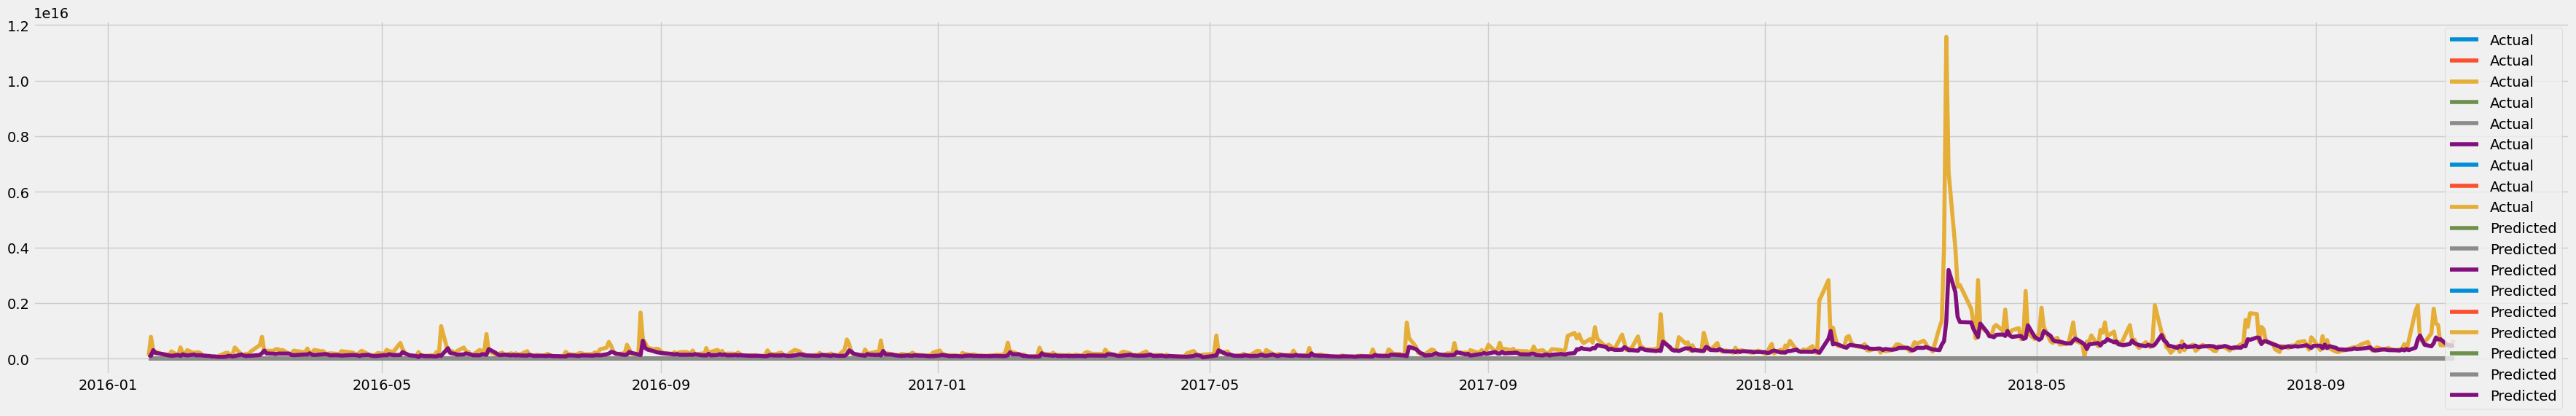

In [32]:
# Create test dates
test_Dates = data.index[4000:4690]

# Define the figure size
fig_size = (40, 6)  # Adjust width and height as needed

# Create a new figure with the specified size
plt.figure(figsize=fig_size)

# Plot actual and predicted data
plt.plot(test_Dates, y_test_actual[-690:], label='Actual')
plt.plot(test_Dates, y_test_pred[-690:], label='Predicted')

# Add legend
plt.legend()

# Show the plot
plt.show()